In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5


In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import json
import plotly.io as pio
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

app = dash.Dash(__name__)

df = pd.read_excel(".\Data\equip-serv-sante-com-2020.xlsx", skiprows=[0, 1, 2, 3, 5])
Df = df.groupby('Département').sum()
Df = Df.drop(['Région'], axis=1)  # les columns non utiles
Df['id'] = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
            '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '976']
d={'01': 'Ain - Bourg-en-bresse','02': ' Aisne - Laon','03': ' Allier - Moulins','04': ' Alpes-de-Haute-Provence - Digne-les-bains','05': ' Hautes-alpes - Gap','06': ' Alpes-maritimes - Nice', '07': ' Ardèche - Privas','08': ' Ardennes - Charleville-mézières','09': ' Ariège - Foix','10': ' Aube - Troyes','11': ' Aude - Carcassonne','12': ' Aveyron - Rodez','13': ' Bouches-du-Rhône - Marseille','14': ' Calvados - Caen','15': ' Cantal - Aurillac','16': ' Charente - Angoulême','17': ' Charente-maritime - La rochelle','18': ' Cher - Bourges','19': ' Corrèze - Tulle','2A': ' Corse-du-sud - Ajaccio','2B': ' Haute-Corse - Bastia','21': "Côte-d'Or - Dijon",'22': "Côtes-d'Armor - Saint-brieuc",'23': ' Creuse - Guéret','24': ' Dordogne - Périgueux','25': ' Doubs - Besançon','26': ' Drôme - Valence','27': ' Eure - Évreux','28': ' Eure-et-loir - Chartres','29': ' Finistère - Quimper','30': ' Gard - Nîmes','31': ' Haute-garonne - Toulouse','32': ' Gers - Auch','33': ' Gironde - Bordeaux','34': ' Hérault - Montpellier','35': ' Ille-et-vilaine - Rennes','36': ' Indre - Châteauroux','37': ' Indre-et-loire - Tours','38': ' Isère - Grenoble','39': ' Jura - Lons-le-saunier','40': ' Landes - Mont-de-marsan','41': ' Loir-et-cher - Blois','42': ' Loire - Saint-étienne','43': ' Haute-loire - Le puy-en-velay','44': ' Loire-atlantique - Nantes','45': ' Loiret - Orléans','46': ' Lot - Cahors','47': ' Lot-et-garonne - Agen','48': ' Lozère - Mende','49': ' Maine-et-loire - Angers','50': ' Manche - Saint-lô','51': ' Marne - Châlons-en-champagne','52': ' Haute-marne - Chaumont','53': ' Mayenne - Laval','54': ' Meurthe-et-moselle - Nancy','55': ' Meuse - Bar-le-duc','56': ' Morbihan - Vannes','57': ' Moselle - Metz','58': ' Nièvre - Nevers','59': ' Nord - Lille','60': ' Oise - Beauvais','61': ' Orne - Alençon','62': ' Pas-de-calais - Arras','63': ' Puy-de-dôme - Clermont-ferrand','64': ' Pyrénées-atlantiques - Pau','65': ' Hautes-Pyrénées - Tarbes','66': ' Pyrénées-orientales - Perpignan','67': ' Bas-rhin - Strasbourg','68': ' Haut-rhin - Colmar','69': ' Rhône - Lyon','70': ' Haute-saône - Vesoul','71': ' Saône-et-loire - Mâcon','72': ' Sarthe - Le mans','73': ' Savoie - Chambéry','74': ' Haute-savoie - Annecy','75': ' Paris - Paris','76': ' Seine-maritime - Rouen','77': ' Seine-et-marne - Melun','78': ' Yvelines - Versailles','79': ' Deux-sèvres - Niort','80': ' Somme - Amiens','81': ' Tarn - Albi','82': ' Tarn-et-Garonne - Montauban','83': ' Var - Toulon','84': ' Vaucluse - Avignon','85': ' Vendée - La roche-sur-yon','86': ' Vienne - Poitiers','87': ' Haute-vienne - Limoges','88': 'Vosges - Épinal','89': 'Yonne - Auxerre','90': 'Territoire de belfort - Belfort','91': 'Essonne - Évry','92': 'Hauts-de-seine - Nanterre','93': 'Seine-Saint-Denis - Bobigny','94': 'Val-de-marne - Créteil','95': "Val-d'Oise - Cergy Pontoise",'971': 'Guadeloupe - Basse-terre','972': 'Martinique - Fort-de-france','973': 'Guyane - Cayenne','974': 'La réunion - Saint-denis','976': 'Mayotte - Mamoudzou'}
s=list(d.values())
Df['Département_name']=s

map = json.load(open(".\Data\contour-des-departements.geojson", 'r'))
data = Df[['Pharmacie', 'id']]

for feature in map['features']:
    feature['id'] = feature['properties']['code']



#fig = px.choropleth_mapbox(Df, locations='id', geojson=map, color='Pharmacie', hover_name='Département_name',hover_data=['Établissement santé court séjour','Établissement santé moyen séjour','Établissement santé long séjour','Établissement psychiatrique','Centre lutte cancer','Urgences','Maternité','Centre de santé','Structures psychiatriques en ambulatoire','Centre médecine préventive','Dialyse','Hospitalisation à domicile','Maison de santé pluridisciplinaire',"Laboratoire d'analyses et de biologie médicale",'Ambulance','Transfusion sanguine','Établissement thermal','Pharmacie'],
#                           mapbox_style="carto-positron",
 #                          center={"lat": 47, "lon": 2},
  #                         zoom=5,opacity=0.8
     #                     ,color_continuous_scale="Viridis")
#fig.update_geos(fitbounds="locations", visible=False)








app.layout = html.Div(children=[
    
                html.H1(children="Group 'ConnectionS'"),

                

                
                html.Div(id="style",children=[]
                     ),
                
                
                

                
                dcc.Dropdown(id="slct_style",
                 options=[
                     {"label": "white-bg", "value": "white-bg"},
                     {"label": "open-street-map", "value": "open-street-map"},
                     {"label": "carto-positron", "value": "carto-positron"},
                     {"label": "carto-darkmatter", "value": "carto-darkmatter"},
                     {"label": "stamen-terrain", "value": "stamen-terrain"}],
                 multi=False,
                 value='carto-positron',
                 style={'width': "40%"}
                 ),
                
                
                dcc.Dropdown(id="slct_couleure",
                 options=[
                     {"label": "px.colors.diverging.BrBG", "value": 1},
                     {"label": "px.colors.sequential.Cividis_r", "value":2},
                     {"label": "Viridis", "value": "Viridis"}],
                 multi=False,
                 value='Viridis',
                 style={'width': "40%"}
                 ),
                
                
                
                
                dcc.Graph(
                id='map',
                figure={}
                ),
                
                
                
                
                
                
                
 ])
                          
@app.callback(
    [Output(component_id='style', component_property='children'),
     Output(component_id='map', component_property='figure')],
    [Input(component_id='slct_style', component_property='value'),
     Input(component_id="slct_couleure", component_property='value')]
)

def update_graph(option_slctd1,option_slctd2):
    if option_slctd2 == 1:
             fig = px.choropleth_mapbox(Df, locations='id', geojson=map, color='Pharmacie', hover_name='Département_name',hover_data=['Établissement santé court séjour','Établissement santé moyen séjour','Établissement santé long séjour','Établissement psychiatrique','Centre lutte cancer','Urgences','Maternité','Centre de santé','Structures psychiatriques en ambulatoire','Centre médecine préventive','Dialyse','Hospitalisation à domicile','Maison de santé pluridisciplinaire',"Laboratoire d'analyses et de biologie médicale",'Ambulance','Transfusion sanguine','Établissement thermal','Pharmacie'],
                                   mapbox_style=option_slctd1,
                                   center={"lat": 47, "lon": 2},
                                   zoom=5,opacity=0.8
                                  ,color_continuous_scale=px.colors.diverging.BrBG)
    elif  option_slctd2 == 2:
         fig = px.choropleth_mapbox(Df, locations='id', geojson=map, color='Pharmacie', hover_name='Département_name',hover_data=['Établissement santé court séjour','Établissement santé moyen séjour','Établissement santé long séjour','Établissement psychiatrique','Centre lutte cancer','Urgences','Maternité','Centre de santé','Structures psychiatriques en ambulatoire','Centre médecine préventive','Dialyse','Hospitalisation à domicile','Maison de santé pluridisciplinaire',"Laboratoire d'analyses et de biologie médicale",'Ambulance','Transfusion sanguine','Établissement thermal','Pharmacie'],
                                   mapbox_style=option_slctd1,
                                   center={"lat": 47, "lon": 2},
                                   zoom=5,opacity=0.8
                                  ,color_continuous_scale=px.colors.sequential.Cividis_r)
    else:
        fig = px.choropleth_mapbox(Df, locations='id', geojson=map, color='Pharmacie', hover_name='Département_name',hover_data=['Établissement santé court séjour','Établissement santé moyen séjour','Établissement santé long séjour','Établissement psychiatrique','Centre lutte cancer','Urgences','Maternité','Centre de santé','Structures psychiatriques en ambulatoire','Centre médecine préventive','Dialyse','Hospitalisation à domicile','Maison de santé pluridisciplinaire',"Laboratoire d'analyses et de biologie médicale",'Ambulance','Transfusion sanguine','Établissement thermal','Pharmacie'],
                                   mapbox_style=option_slctd1,
                                   center={"lat": 47, "lon": 2},
                                   zoom=5,opacity=0.8
                                  ,color_continuous_scale='Viridis')
         
    fig.update_geos(fitbounds="locations", visible=False)
    return option_slctd1,fig


if __name__ == '__main__':
    app.run_server(debug=True)



C:\Users\Marouane\AppData\Local\Temp/ipykernel_3744/3706839422.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Marouane\AppData\Local\Temp/ipykernel_3744/3706839422.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\Marouane\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


                                             district  Coderre  Bergeron  \
0                                  101-Bois-de-Liesse     2481      1829   
1                               102-Cap-Saint-Jacques     2525      1163   
2                                11-Sault-au-Récollet     3348      2770   
3                                        111-Mile-End     1734      4782   
4                                      112-DeLorimier     1770      5933   
5                                    113-Jeanne-Mance     1455      3599   
6                                    12-Saint-Sulpice     3252      2521   
7                          121-La Pointe-aux-Prairies     5456      1760   
8                             122-Pointe-aux-Trembles     4734      1879   
9                            123-Rivière-des-Prairies     5737       958   
10                                        13-Ahuntsic     2979      3430   
11                                  131-Saint-Édouard     1827      6408   
12          

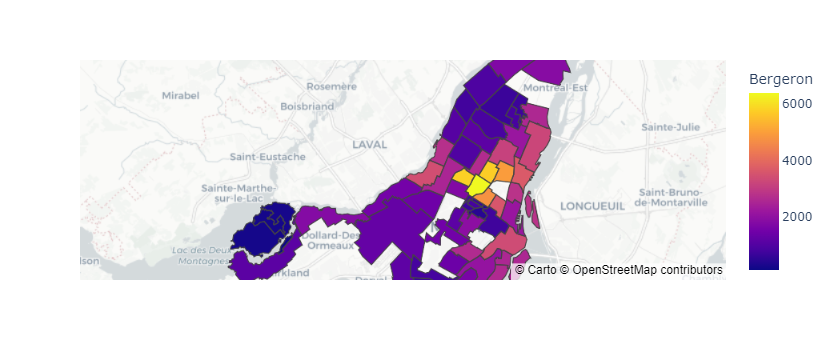

In [6]:
import plotly.express as px

df = px.data.election()
print(df)
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.show()

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from numpy import log2
import pandas as pd
Path="./Data/estim-pop-dep-sexe-gca-1975-2021.xlsx"
Path2="./Data/equip-serv-sante-com-2020.xlsx"
#df = pd.read_excel (Path,sheet_name='2021',skiprows=[0,1,2,3],usecols=[0,1])


#for x in df:
 #   for n in df[x]:
  #      L.append(n)


def df(Path,column):

    L=[]
    i=column
    df = pd.read_excel (Path,sheet_name='2021',skiprows=[0,1,2,3,101,107,108,111,112
    ,110,109],usecols=[i],names='A')
    for i in range(len(df['A'])):
        L.append(df['A'][i])
    return L

#li

def list_pourc_vieux():
    dep=df(Path,0)
    nomb_vieux_1=df(Path,5)
    nomb_vieux_2=df(Path,6)
    pourc_vieux=[]
    nomb_total=df(Path,7)
    for i in range(len(nomb_vieux_1)):
        a=nomb_vieux_1[i]+nomb_vieux_2[2]
        b=(int((a*100/nomb_total[i])*100))/100
        pourc_vieux.append(b)
    return pourc_vieux


def nomb_population():
    total=df(Path,7)
    return total



def pourc_vieux(dep):
    L=list_pourc_vieux()
    B=df(Path,0)
    i=B.index(dep)
    return L[i]

print(pourc_vieux('01'))

def data_des_agées():
    data_des_agées=pd.DataFrame({'dep':df(Path,0),'pourc_vieux':list_pourc_vieux()})
    return data_des_agées



#print(data_des_agées())
def Df():
    d = pd.read_excel(".\Data\equip-serv-sante-com-2020.xlsx", skiprows=[0, 1, 2, 3, 5])
    Df = d.groupby('Département').sum()
    Df = Df.drop(['Région'], axis=1)  # les columns non utiles
    Df['id'] = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
                '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '976']
    d={'01': 'Ain - Bourg-en-bresse','02': ' Aisne - Laon','03': ' Allier - Moulins','04': ' Alpes-de-Haute-Provence - Digne-les-bains','05': ' Hautes-alpes - Gap','06': ' Alpes-maritimes - Nice', '07': ' Ardèche - Privas','08': ' Ardennes - Charleville-mézières','09': ' Ariège - Foix','10': ' Aube - Troyes','11': ' Aude - Carcassonne','12': ' Aveyron - Rodez','13': ' Bouches-du-Rhône - Marseille','14': ' Calvados - Caen','15': ' Cantal - Aurillac','16': ' Charente - Angoulême','17': ' Charente-maritime - La rochelle','18': ' Cher - Bourges','19': ' Corrèze - Tulle','2A': ' Corse-du-sud - Ajaccio','2B': ' Haute-Corse - Bastia','21': "Côte-d'Or - Dijon",'22': "Côtes-d'Armor - Saint-brieuc",'23': ' Creuse - Guéret','24': ' Dordogne - Périgueux','25': ' Doubs - Besançon','26': ' Drôme - Valence','27': ' Eure - Évreux','28': ' Eure-et-loir - Chartres','29': ' Finistère - Quimper','30': ' Gard - Nîmes','31': ' Haute-garonne - Toulouse','32': ' Gers - Auch','33': ' Gironde - Bordeaux','34': ' Hérault - Montpellier','35': ' Ille-et-vilaine - Rennes','36': ' Indre - Châteauroux','37': ' Indre-et-loire - Tours','38': ' Isère - Grenoble','39': ' Jura - Lons-le-saunier','40': ' Landes - Mont-de-marsan','41': ' Loir-et-cher - Blois','42': ' Loire - Saint-étienne','43': ' Haute-loire - Le puy-en-velay','44': ' Loire-atlantique - Nantes','45': ' Loiret - Orléans','46': ' Lot - Cahors','47': ' Lot-et-garonne - Agen','48': ' Lozère - Mende','49': ' Maine-et-loire - Angers','50': ' Manche - Saint-lô','51': ' Marne - Châlons-en-champagne','52': ' Haute-marne - Chaumont','53': ' Mayenne - Laval','54': ' Meurthe-et-moselle - Nancy','55': ' Meuse - Bar-le-duc','56': ' Morbihan - Vannes','57': ' Moselle - Metz','58': ' Nièvre - Nevers','59': ' Nord - Lille','60': ' Oise - Beauvais','61': ' Orne - Alençon','62': ' Pas-de-calais - Arras','63': ' Puy-de-dôme - Clermont-ferrand','64': ' Pyrénées-atlantiques - Pau','65': ' Hautes-Pyrénées - Tarbes','66': ' Pyrénées-orientales - Perpignan','67': ' Bas-rhin - Strasbourg','68': ' Haut-rhin - Colmar','69': ' Rhône - Lyon','70': ' Haute-saône - Vesoul','71': ' Saône-et-loire - Mâcon','72': ' Sarthe - Le mans','73': ' Savoie - Chambéry','74': ' Haute-savoie - Annecy','75': ' Paris - Paris','76': ' Seine-maritime - Rouen','77': ' Seine-et-marne - Melun','78': ' Yvelines - Versailles','79': ' Deux-sèvres - Niort','80': ' Somme - Amiens','81': ' Tarn - Albi','82': ' Tarn-et-Garonne - Montauban','83': ' Var - Toulon','84': ' Vaucluse - Avignon','85': ' Vendée - La roche-sur-yon','86': ' Vienne - Poitiers','87': ' Haute-vienne - Limoges','88': 'Vosges - Épinal','89': 'Yonne - Auxerre','90': 'Territoire de belfort - Belfort','91': 'Essonne - Évry','92': 'Hauts-de-seine - Nanterre','93': 'Seine-Saint-Denis - Bobigny','94': 'Val-de-marne - Créteil','95': "Val-d'Oise - Cergy Pontoise",'971': 'Guadeloupe - Basse-terre','972': 'Martinique - Fort-de-france','973': 'Guyane - Cayenne','974': 'La réunion - Saint-denis','976': 'Mayotte - Mamoudzou'}
    s=list(d.values())
    Df['Département_name']=s

    #f=data_des_agées().groupby('dep').sum()
    #t=f.groupby('dep').sum()
    #print(t)
    l=list_pourc_vieux()
    j=nomb_population()
    #Df['pourcentage_agées']=l
    #Df['nombre de population']=j
    return Df
print(Df())
print(data_des_agées())




23.06
             Établissement santé court séjour  \
Département                                     
01                                         13   
02                                         12   
03                                          8   
04                                          8   
05                                          6   
...                                       ...   
971                                        10   
972                                         9   
973                                         5   
974                                        13   
976                                         0   

             Établissement santé moyen séjour  \
Département                                     
01                                         22   
02                                         13   
03                                          9   
04                                         11   
05                                         14   
...          